In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [2]:
topo="32_6_Slimfly"

In [3]:
# ugal_routing = "ugal_precise"
ugal_routing = "ugal_threshold"

### num_samples on the x-axis, speedup on the y-axis, ugal as a reference line

In [6]:
def plot_for_traffic(traffic:str):
    ECMP_ASP_data = pd.read_csv(f'/users/ziyzhang/EFM_experiments/Merlin_experiments/data/{topo}_ASP_nonadaptive_{traffic}_.csv')
    ugal_data = pd.read_csv(f'/users/ziyzhang/EFM_experiments/Merlin_experiments/data/{topo}_ASP_{ugal_routing}_{traffic}_.csv')
    IT_data = pd.read_csv(f'/users/ziyzhang/EFM_experiments/Merlin_experiments/data/{topo}_Nexullance_IT_{traffic}_nonadaptive_weighted_{traffic}_.csv')
    APST4_data = pd.read_csv(f'/users/ziyzhang/EFM_experiments/Merlin_experiments/data/{topo}_Nexullance_MP_APST_4_{traffic}_nonadaptive_weighted_{traffic}_.csv')

    fig, ax = plt.subplots(figsize=(6, 4)) 

    ax.plot(ECMP_ASP_data["Offered Load"], ECMP_ASP_data["Average Latency (ns)"], label="ECMP_ASP", c="b", linestyle='-', marker='o')
    ax.plot(ugal_data["Offered Load"], ugal_data["Average Latency (ns)"], label="ugal", c="r", linestyle='-', marker='x')
    ax.plot(IT_data["Offered Load"], IT_data["Average Latency (ns)"], label="SD_Nexullance_IT", c="g", linestyle='--', marker='<')
    ax.plot(APST4_data["Offered Load"], APST4_data["Average Latency (ns)"], label="SD_Nexullance_MP_APST4", c="orange", linestyle='--', marker='>')

    # ax.set_ylim(top=2.2)
    ax.set_xlim(xmin=0.0 ,xmax=1.0)
    ax.set_ylim(ymin=0, ymax= 3000)
    ax.set_xlabel("sampling interval [us]")
    # ax.set_xlabel("number of samples for MD_Nexullance method")
    ax.set_ylabel("average packet latency [ns]")
    ax.legend()


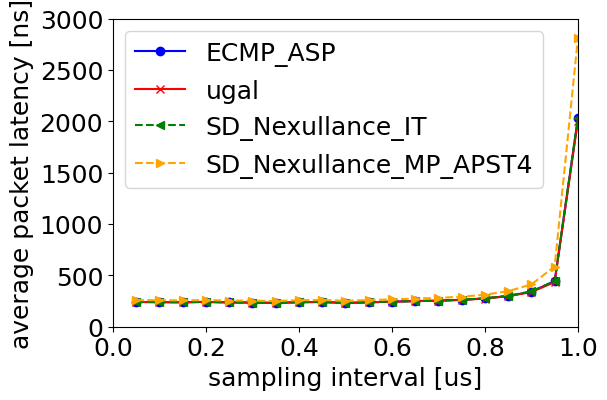

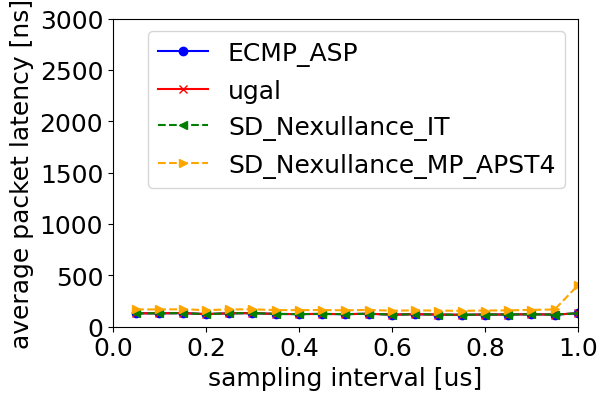

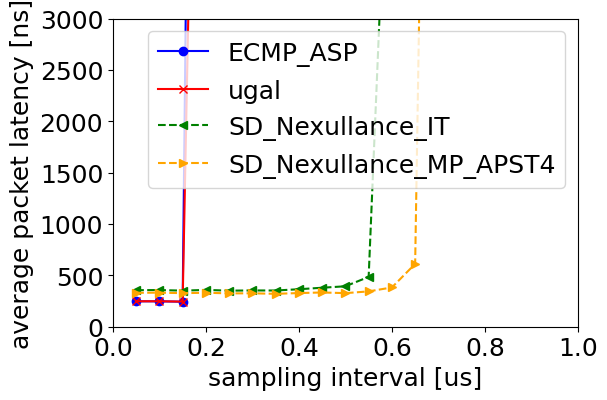

In [7]:
plot_for_traffic("uniform")
plot_for_traffic("shift_1")
plot_for_traffic("shift_half")